<a href="https://colab.research.google.com/github/sanjaytallolli/DATA-SCIENCE/blob/master/TF_2_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2.0 Intro

## Imports


In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

Requirement already up-to-date: tensorflow_gpu==2.0 in /usr/local/lib/python3.6/dist-packages (2.0.0)


## Loading data and visualisation

In [0]:

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

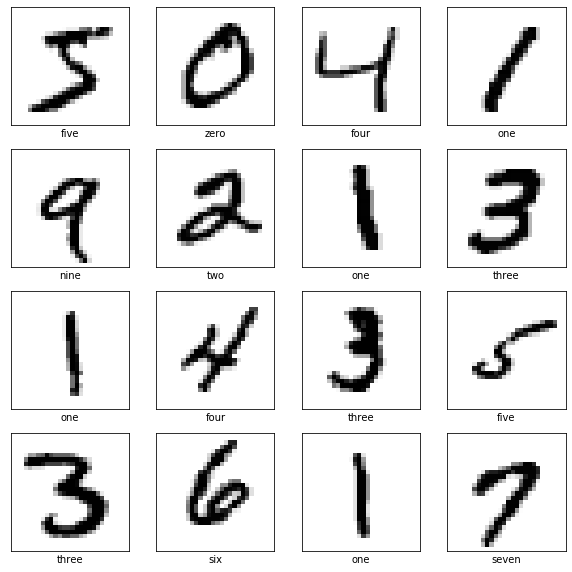

In [11]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Definition

In [12]:
IMG_SIZE = (28, 28, 1)
input_img = layers.Input(shape=IMG_SIZE)

model = layers.Conv2D(32, (3, 3), padding='same')(input_img)
model = layers.Activation('relu')(model)
model = layers.Conv2D(32, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)

model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(32)(model)
model = layers.Activation('relu')(model)
model = layers.Dense(10)(model)
output_img = layers.Activation('softmax')(model)

model = models.Model(input_img, output_img)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)        0   

## Training and Testing

In [0]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [0]:
adam = optimizers.Adam(lr=0.0001)
model.compile(adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.8826 - acc: 0.7045 - val_loss: 0.2919 - val_acc: 0.9213
Epoch 2/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.2794 - acc: 0.9210 - val_loss: 0.1715 - val_acc: 0.9492
Epoch 3/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.2021 - acc: 0.9421 - val_loss: 0.1427 - val_acc: 0.9592
Epoch 4/10
60000/60000 [==============================] - 18s 300us/sample - loss: 0.1607 - acc: 0.9535 - val_loss: 0.1489 - val_acc: 0.9583
Epoch 5/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.1288 - acc: 0.9617 - val_loss: 0.1260 - val_acc: 0.9628
Epoch 6/10
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1104 - acc: 0.9672 - val_loss: 0.0874 - val_acc: 0.9723
Epoch 7/10
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0957 - acc: 0.9704 

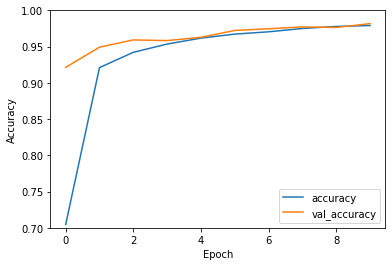

In [26]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

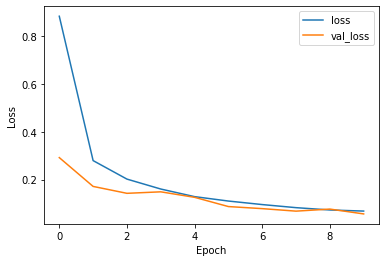

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [27]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy = {0:.2f}%'.format(test_accuracy*100.0))

10000/10000 - 1s - loss: 0.0566 - acc: 0.9817

Test accuracy = 98.17%
